In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv("titanic_data.csv")

In [7]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
font = {
    'weight' : 'bold',
    'size'   : 22
}

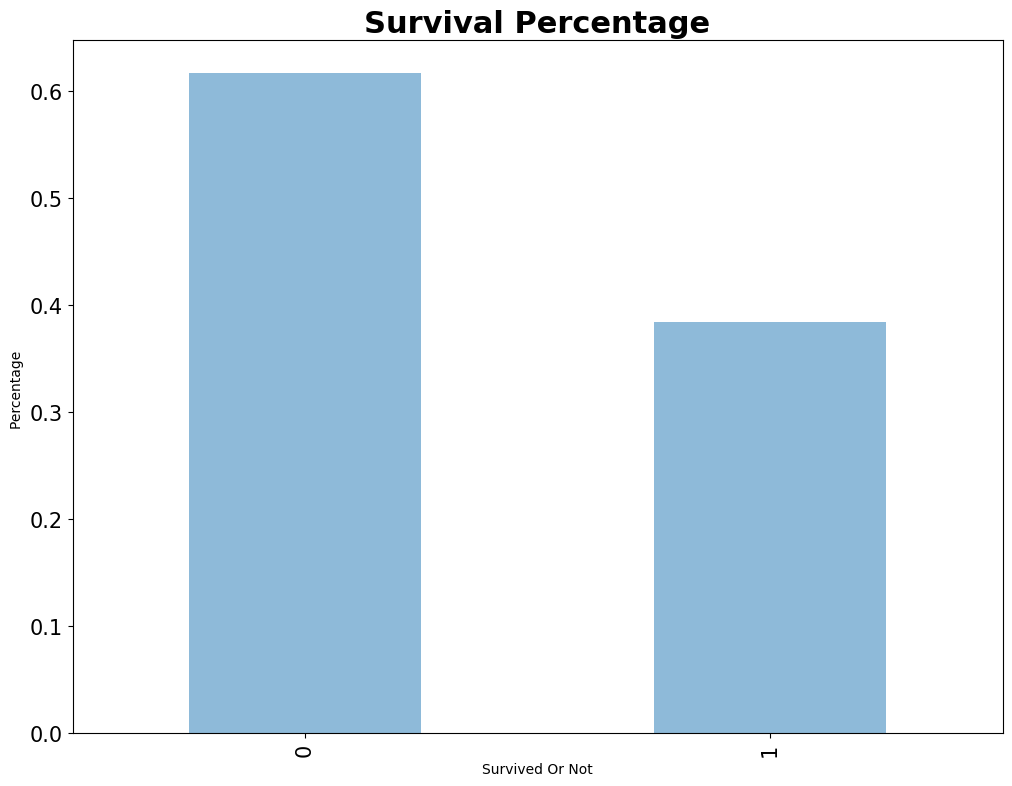

In [12]:
plt.figure(figsize=(12,9))
titanic_data['Survived'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Survived Or Not')
plt.ylabel('Percentage ')
plt.title("Survival Percentage", fontdict=font)
# plt.legend(loc='best')
plt.savefig('Survival.png')
plt.show()

In [13]:
import numpy as np


In [14]:
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [15]:
print("age",titanic_data.Age.isna().sum())
print("cabin",titanic_data.Cabin.isna().sum())
print("embark",titanic_data.Embarked.isna().sum())

age 177
cabin 687
embark 2


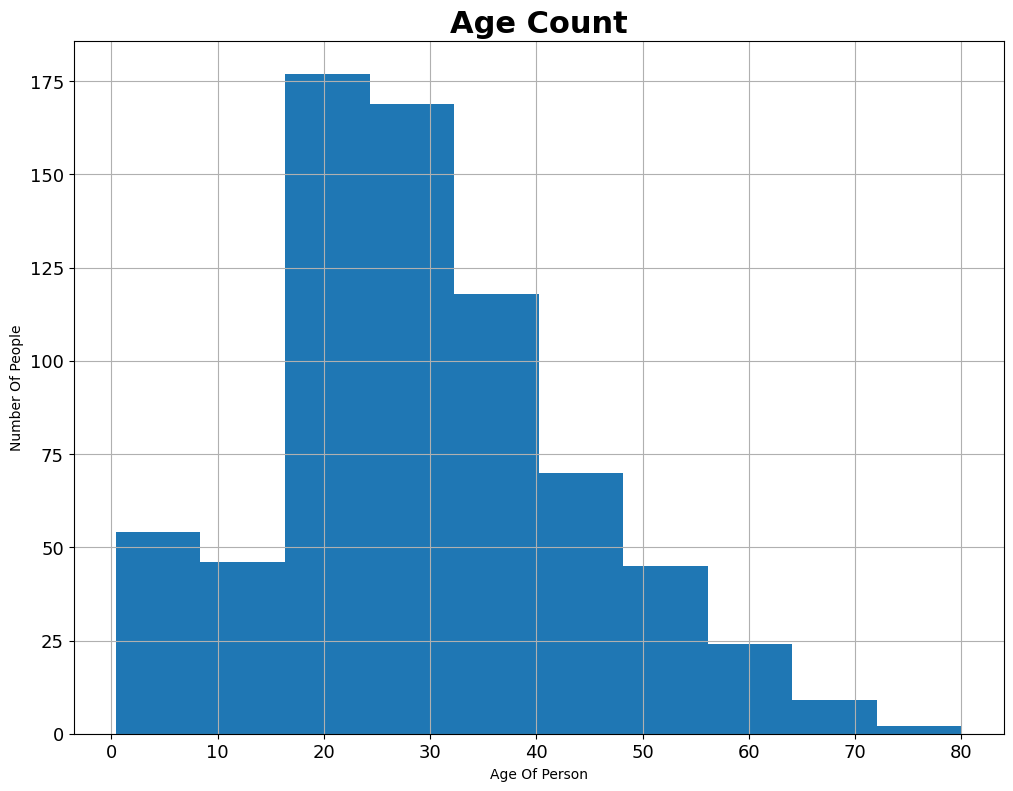

In [16]:
plt.figure(figsize=(12,9))
titanic_data.Age.hist()
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Age Of Person')
plt.ylabel('Number Of People')
plt.title("Age Count", fontdict=font)
# plt.legend(loc='best')
plt.savefig('Age.png')
plt.show()


In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


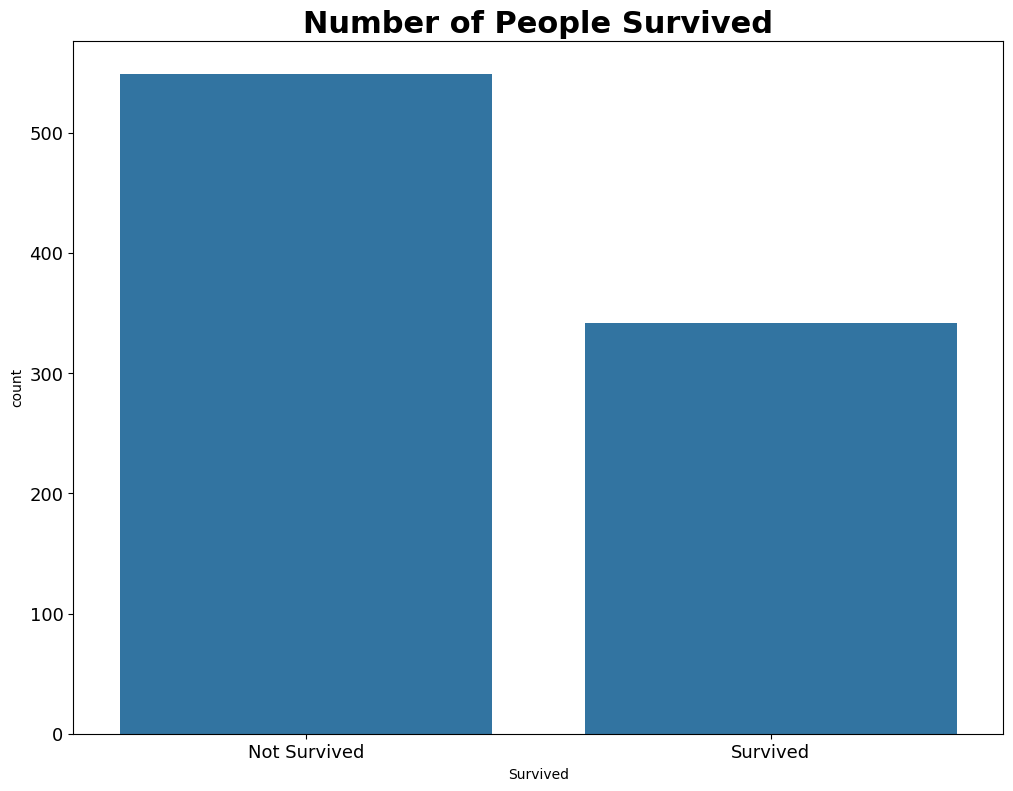

In [18]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',data=titanic_data)
label=['Not Survived','Survived']
plt.xticks(titanic_data['Survived'].unique(), label, size=13)
plt.yticks(size=13)
plt.title("Number of People Survived", fontdict=font)
plt.savefig('survived_people.png')
plt.show()


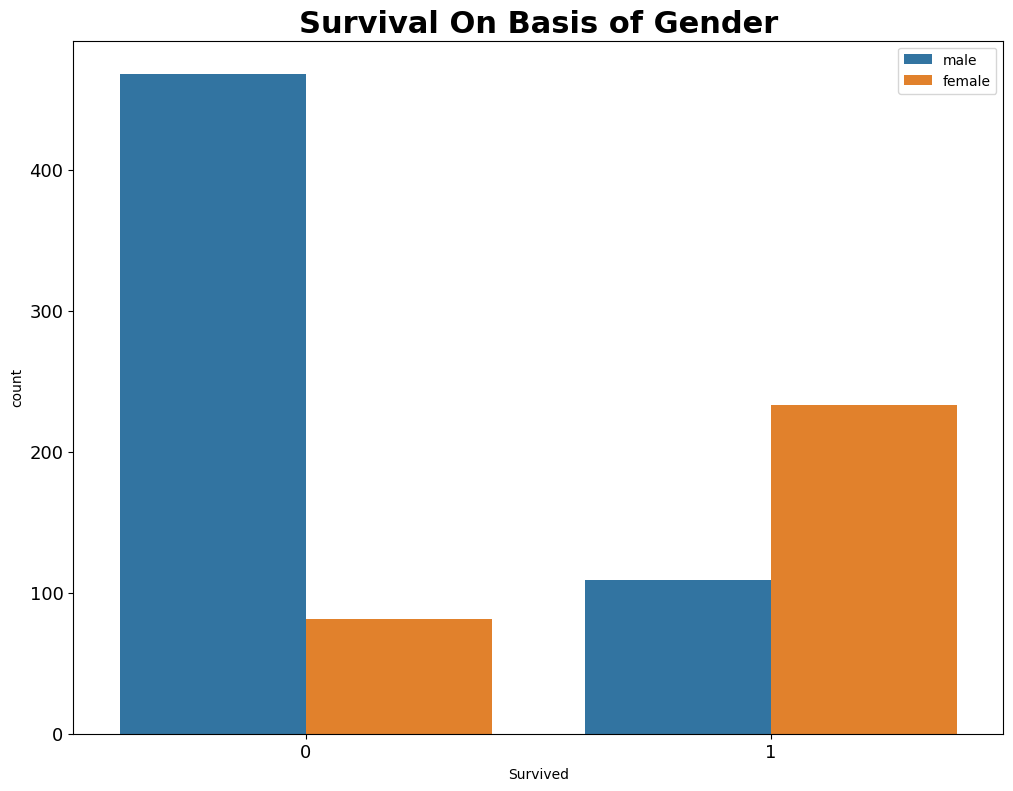

In [19]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',hue='Sex',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Gender", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_gender.png')
plt.show()


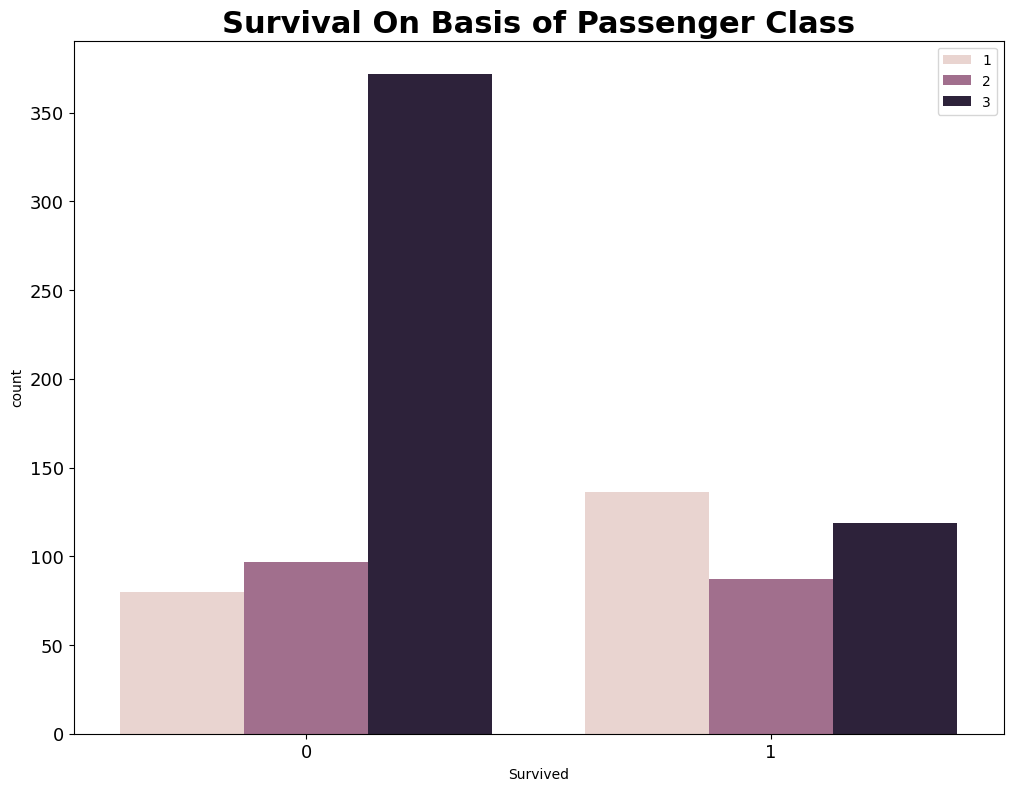

In [20]:
plt.figure(figsize=(12,9))

sns.countplot(x='Survived',hue='Pclass',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Passenger Class", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_Pclass.png')
plt.show()


<Axes: ylabel='Frequency'>

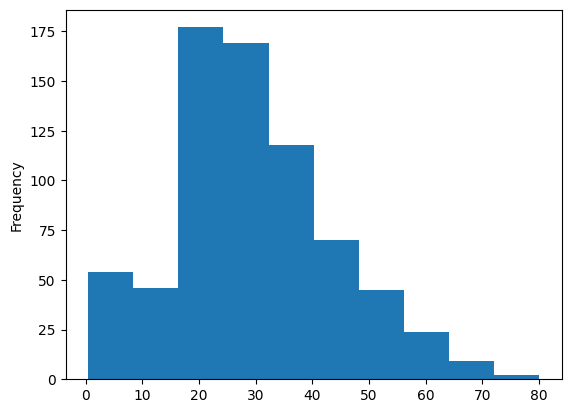

In [21]:
titanic_data['Age'].plot.hist()

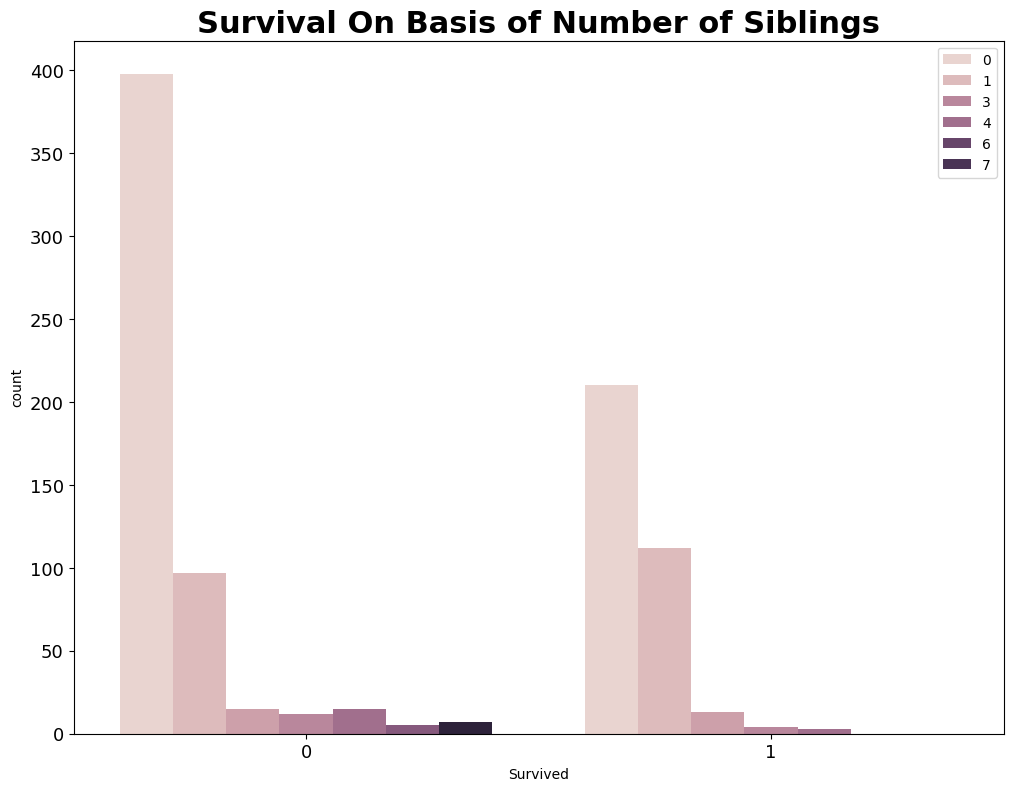

In [22]:
plt.figure(figsize=(12,9))


sns.countplot(x='Survived',hue='SibSp',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Number of Siblings", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_sibling.png')
plt.show()


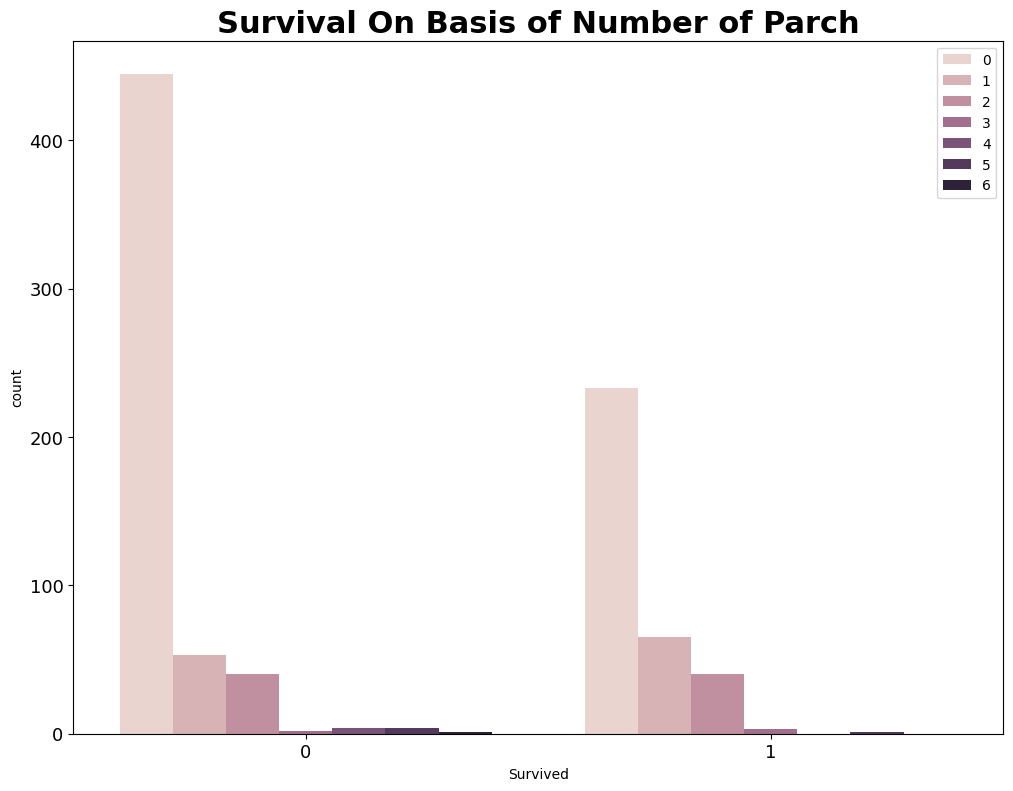

In [23]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived',hue='Parch',data=titanic_data)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Number of Parch", fontdict=font)
plt.legend(loc='best')
plt.savefig('Survival_parch.png')
plt.show()


In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [14]:
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

In [15]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("\n===== Logistic Regression Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


===== Logistic Regression Results =====
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [19]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\n===== Random Forest Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


===== Random Forest Results =====
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

